In [1]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("data/Student_performance_data _.csv")

In [4]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [5]:
df.drop(["Ethnicity","ParentalEducation","StudyTimeWeekly","ParentalSupport","Extracurricular","Sports","Music","Volunteering"],axis=1,inplace=True)

In [6]:
df.head()

,StudentID,Age,Gender,Absences,Tutoring,GPA,GradeClass
0,1001,17,1,7,1,2.929196,2.0
1,1002,18,0,0,0,3.042915,1.0
2,1003,15,0,26,0,0.112602,4.0
3,1004,17,1,14,0,2.054218,3.0
4,1005,17,1,17,1,1.288061,4.0


In [7]:
X=df.drop(columns=["GPA"],axis=1)

In [8]:
y=df['GPA']

In [9]:
num_features=X.select_dtypes(exclude=object).columns
cat_features=X.select_dtypes(include=object).columns

In [10]:
num_features

Index(['StudentID', 'Age', 'Gender', 'Absences', 'Tutoring', 'GradeClass'], dtype='object')

In [11]:
cat_features

Index([], dtype='object')

In [12]:
X


,StudentID,Age,Gender,Absences,Tutoring,GradeClass
0,1001,17,1,7,1,2.0
1,1002,18,0,0,0,1.0
2,1003,15,0,26,0,4.0
3,1004,17,1,14,0,3.0
4,1005,17,1,17,1,4.0
...,...,...,...,...,...,...
2387,3388,18,1,2,0,0.0
2388,3389,17,0,4,1,4.0
2389,3390,16,1,20,0,2.0
2390,3391,16,1,17,0,1.0


In [13]:
y

0       2.929196
1       3.042915
2       0.112602
3       2.054218
4       1.288061
          ...   
2387    3.455509
2388    3.279150
2389    1.142333
2390    1.803297
2391    2.140014
Name: GPA, Length: 2392, dtype: float64

In [14]:
num_features=X.select_dtypes(exclude=object).columns
cat_features=X.select_dtypes(include=object).columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_tranformer=OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_tranformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [15]:
X=preprocessor.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
def evaluate_model(true ,predicted):
    mae=mean_absolute_error(true, predicted)
    score=r2_score(true ,predicted)
    mse=mean_squared_error(true ,predicted)
    rmse=np.sqrt(mean_squared_error(true ,predicted))
    return mae,rmse,score

In [20]:
models={
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "catBoost Regressor": CatBoostRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}

model_list= []
r2_list = []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2_score = evaluate_model(y_train,y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2_score = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set")
    print("Root mean square error: {:.4f}".format(model_train_rmse))
    print("Mean absolute error: {:.4f}".format(model_train_mae))
    print("R2 score: {:.4f}",format(model_train_r2_score))


    print('----------------')

    print("Model performance for test set")
    print("Root mean square error: {:.4f}".format(model_test_rmse))
    print("Mean absolute error: {:.4f}".format(model_test_mae))
    print("R2 score: {:.4f}",format(model_test_r2_score))
    r2_list.append(model_test_r2_score)

    print('='*35)
    print('\n')

LinearRegression
Model performance for training set
Root mean square error: 0.3137
Mean absolute error: 0.2495
R2 score: {:.4f} 0.8821056768658797
----------------
Model performance for test set
Root mean square error: 0.3057
Mean absolute error: 0.2359
R2 score: {:.4f} 0.8890115495279971


Lasso
Model performance for training set
Root mean square error: 0.9137
Mean absolute error: 0.7712
R2 score: {:.4f} 0.0
----------------
Model performance for test set
Root mean square error: 0.9179
Mean absolute error: 0.7740
R2 score: {:.4f} -0.0006575032713795892


Ridge
Model performance for training set
Root mean square error: 0.3137
Mean absolute error: 0.2495
R2 score: {:.4f} 0.8821053690971538
----------------
Model performance for test set
Root mean square error: 0.3057
Mean absolute error: 0.2358
R2 score: {:.4f} 0.8890194435938642


K-Neighbors Regressor
Model performance for training set
Root mean square error: 0.2491
Mean absolute error: 0.1868
R2 score: {:.4f} 0.9257005974985221
-----

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)),columns=['Model Name', 'R2_score']).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
7,catBoost Regressor,0.913717
5,RandomForestRegressor,0.901259
8,AdaBoostRegressor,0.891445
2,Ridge,0.889019
0,LinearRegression,0.889012
6,XGBRegressor,0.885872
3,K-Neighbors Regressor,0.883416
4,DecisionTreeRegressor,0.843838
1,Lasso,-0.000658


In [23]:
lin_Model = LinearRegression(fit_intercept=True)
lin_Model = lin_Model.fit(X_train, y_train)
y_pred = lin_Model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.90


Text(0, 0.5, 'Predicted')

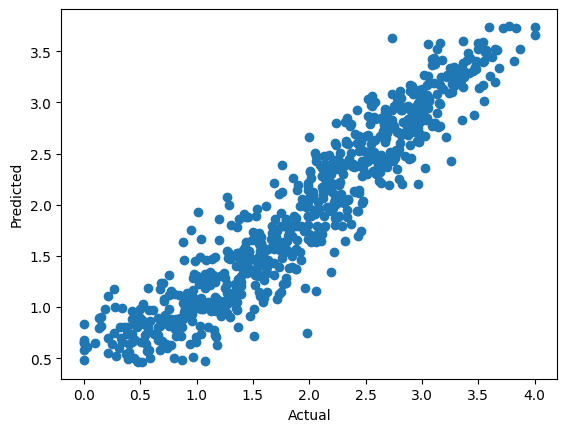

In [24]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

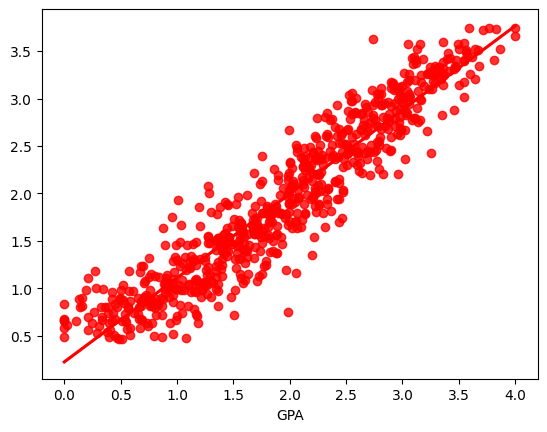

In [28]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');

In [29]:
pred_df=pd.DataFrame({'Actual value':y_test,'Predicted value': y_pred,'Difference': y_test-y_pred})

In [30]:
pred_df

,Actual value,Predicted value,Difference
1004,1.427724,1.501769,-0.074045
196,3.117354,3.372815,-0.255460
2342,2.037769,1.951505,0.086263
1708,3.548521,3.402669,0.145851
435,0.248977,0.635766,-0.386789
...,...,...,...
1626,0.574278,0.973082,-0.398804
32,0.384617,0.805644,-0.421027
952,1.179903,1.078071,0.101833
787,2.635341,2.673645,-0.038303
